In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x260a725e0c0>)

In [4]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [5]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [6]:
train_data.drop_duplicates(subset=['document'], inplace=True)

<Axes: xlabel='label'>

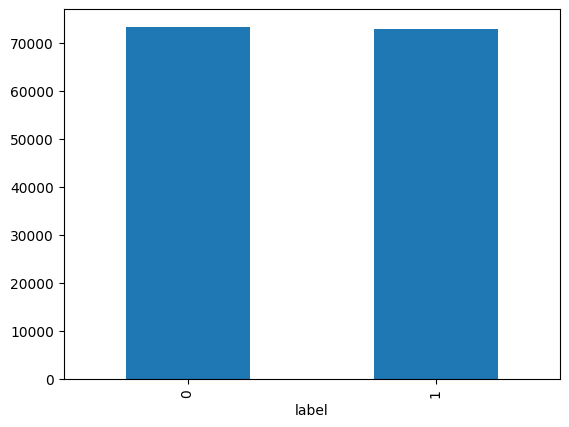

In [7]:
train_data['label'].value_counts().plot(kind = 'bar')

In [8]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72841


In [9]:
print(train_data.isnull().values.any())

True


In [10]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [11]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [12]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [13]:
print(len(train_data))

146182


In [14]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [16]:
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경

In [17]:
train_data['document'].replace('', np.nan, inplace=True)

C:\Users\hi\AppData\Local\Temp\ipykernel_3388\1594716675.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['document'].replace('', np.nan, inplace=True)


In [ ]:
print(train_data.isnull().sum())